In [4]:
%load_ext autoreload
%autoreload 2
import pickle, json
from enterprise_extensions.models import model_2a
from enterprise.signals.parameter import sample
import numpy as np
from impulse.pta_utils import initial_sample, setup_sampler
import matplotlib.pyplot as plt
from emcee.autocorr import integrated_time

from PTMCMCSampler.PTMCMCSampler import PTSampler as ptmcmc


Do not have acor package


In [5]:
with open('/Users/aaron/Documents/GitHub/12p5yr_stochastic_analysis/tutorials/data/psrs.pkl', 'rb') as f:
    psrs = pickle.load(f)

with open('/Users/aaron/Documents/GitHub/12p5yr_stochastic_analysis/tutorials/data/channelized_12p5yr_v3_full_noisedict.json', 'r') as f:
    params = json.load(f)

In [6]:
pta = model_2a(psrs, noisedict=params, gamma_common=4.33, n_gwbfreqs=5, tm_marg=True, tnequad=True, tm_svd=True)

In [7]:
ntemps = 31
nchains = None
ndim, x0 = initial_sample(pta, ntemps, nchains)

In [8]:
sampler = setup_sampler(pta, ret_chain=True, prior_sample=True, resume=False, num_samples=5e6, ntemps=31, ncores=4, outdir='/pta_test')

2022-07-25 23:18:59.465 | INFO     | impulse.base:_setup_pool:222 - Setting up multiprocessing pool with 4 processes
2022-07-25 23:18:59.536 | INFO     | impulse.pta_utils:setup_sampler:1111 - Adding red noise prior draws...

2022-07-25 23:18:59.538 | INFO     | impulse.pta_utils:setup_sampler:1146 - Adding GWB uniform distribution draws...



In [9]:
chain = sampler.sample()  # 439 hours with 4 cores  (>50 hours with 1 core)

  0%|          | 0/5000 [00:00<?, ?it/s]/Users/aaron/Documents/GitHub/enterprise/enterprise/signals/parameter.py:62: RuntimeWarning: divide by zero encountered in log
  logpdf = np.log(self.prior(value, **kwargs))


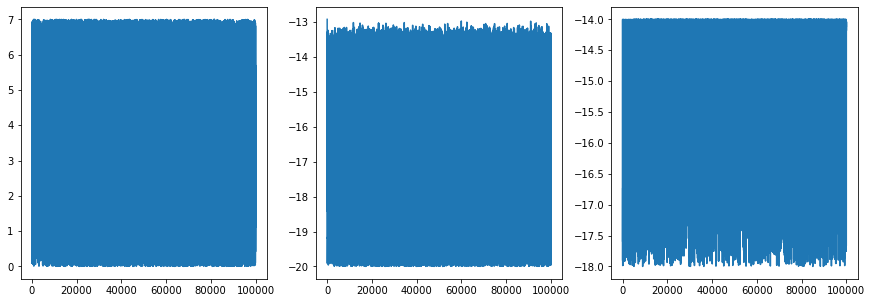

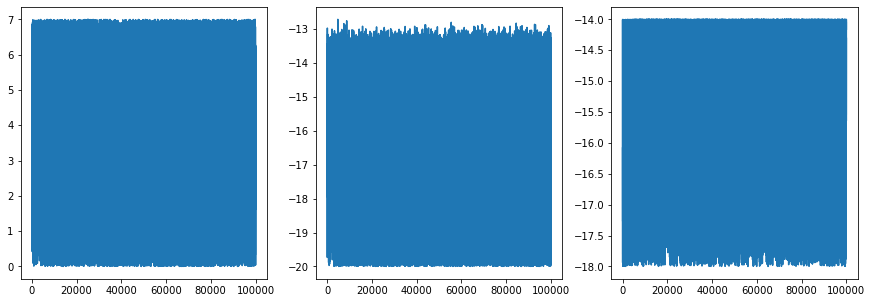

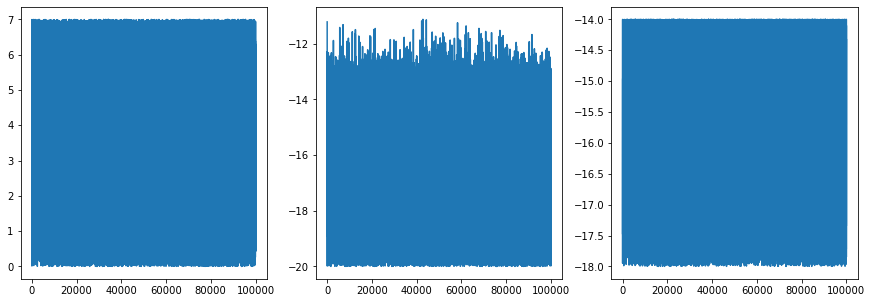

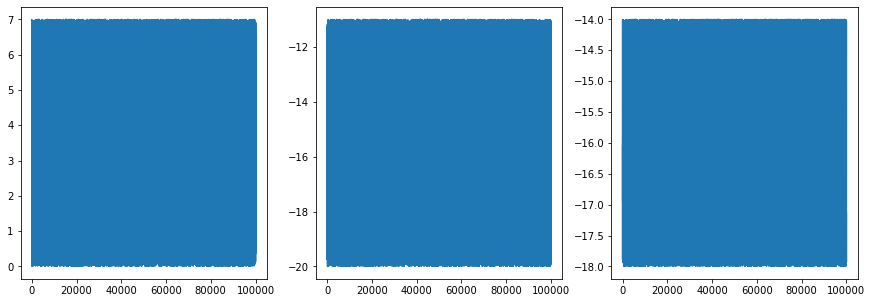

In [10]:
for ii in range(ntemps):
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].plot(chain[::10, 0, ii])
    ax[1].plot(chain[::10, 1, ii])
    ax[2].plot(chain[::10, 2, ii])
    plt.show()

In [22]:
x0 = np.hstack([p.sample() for p in pta.params])
ndim = len(x0)
cov = np.diag(np.ones(ndim) * 0.01**2)

outDir = './chains/sngl/'

sampler = ptmcmc(ndim, pta.get_lnlikelihood, pta.get_lnprior, cov,
                 outDir=outDir, resume=False)

In [23]:
N = int(1e6)
x0 = np.hstack([p.sample() for p in pta.params])
sampler.sample(x0, N, SCAMweight=30, AMweight=15, DEweight=50)

Finished 0.10 percent in 0.269734 s Acceptance rate = 0.95

/Users/aaron/Documents/GitHub/enterprise/enterprise/signals/parameter.py:62: RuntimeWarning: divide by zero encountered in log
  logpdf = np.log(self.prior(value, **kwargs))


Finished 1.00 percent in 2.160348 s Acceptance rate = 0.327489Adding DE jump with weight 50
Finished 99.90 percent in 187.686014 s Acceptance rate = 0.216825
Run Complete


In [52]:
outDir = './chains/sngl/'
with open(outDir + 'chain_1.txt', 'r') as f:
    chain2 = np.loadtxt(f)

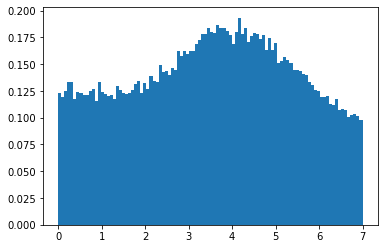

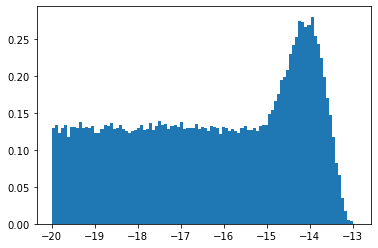

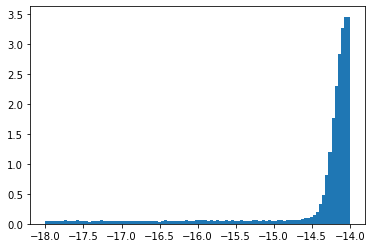

In [13]:
for ii in range(3):
    __, bins, __ = plt.hist(chain[20_000:, ii, 0], bins=100, density=True)
    # plt.hist(chain2[20_000:, ii], bins=bins, density=True, alpha=0.5)
    # plt.hist(samples[:, ii], bins=bins, density=True, alpha=0.5)
    plt.show()

In [14]:
ii = 2
print(integrated_time(chain[20000:, ii, 0]) / 10)
# print(integrated_time(chain2[20_000:, ii]))

[11.38100161]


In [15]:
ii = 2
# print(integrated_time(chain2[:, ii]))
print(integrated_time(chain[:, ii, 0], quiet=True) / 10)
# print(integrated_time(samples[:, ii], quiet=True))

[11.66059687]
